In [7]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

In [12]:
from qiskit import QuantumCircuit, Aer, execute

# Create a quantum circuit with one qubit and one classical bit
circuit = QuantumCircuit(1, 1)

# Apply a Hadamard gate to the qubit to create a superposition state
circuit.h(0)

# Measure the qubit and store the result in the classical bit
circuit.measure(0, 0)

# Set up the simulator and run the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1000)
result = job.result()

# Get the histogram of measurement outcomes
counts = result.get_counts()
print(counts)



{'1': 509, '0': 491}


In [9]:

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[1], creg_c[1])

print (circuit)



          ┌───┐        
q_0: ─|0>─┤ H ├──■─────
          └───┘┌─┴─┐┌─┐
q_1: ─|0>──────┤ X ├┤M├
               └───┘└╥┘
c: 2/════════════════╩═
                     1 


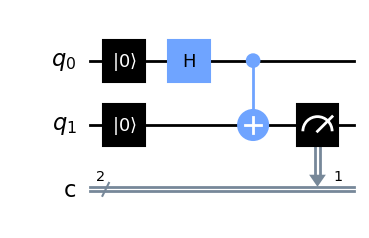

In [10]:
circuit.draw()

In [17]:
resone = list(counts.keys())[0]

print(res)

0


In [14]:
res = list(counts.keys())[1]
print(res)


0


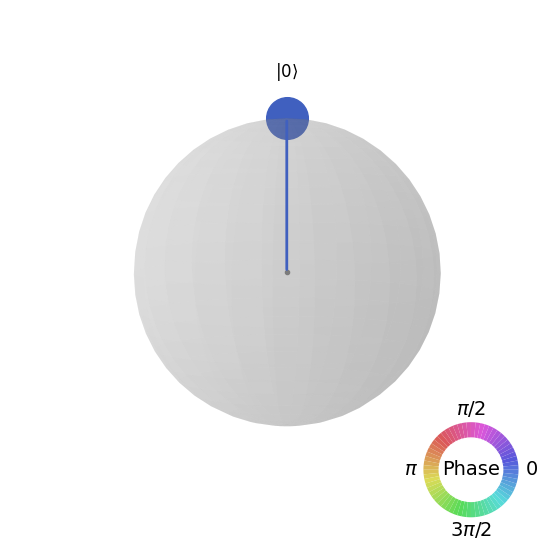

In [15]:
plot_state_qsphere([1,0])

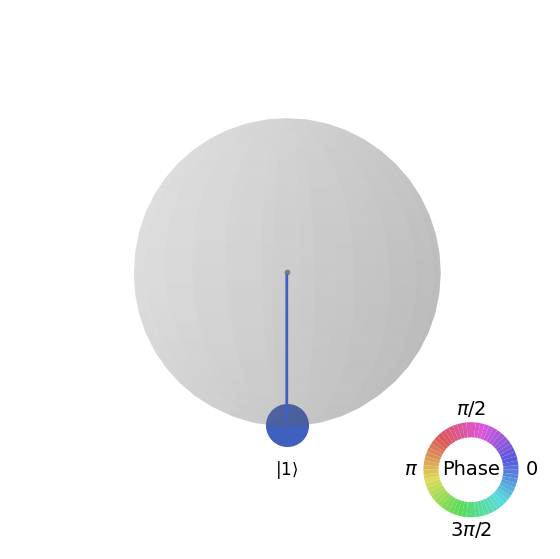

In [16]:
plot_state_qsphere([0, 1])

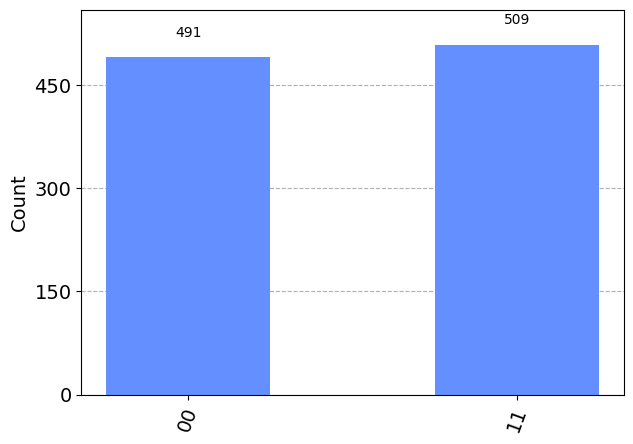

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit import *
from qiskit.visualization import plot_histogram

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend = backend, shots = 1000)  # Make sure you change "qc" to the name of your quantum circuit in this line!
result = job.result()
counts = result.get_counts()
plot_histogram(counts)